<a href="https://colab.research.google.com/github/Suraj-Patro/img_enc_des3/blob/main/Encryption_of_Image_Using_Triple_DES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries & Utilies

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io
!pip install pyDes
from pyDes import *

Populating the interactive namespace from numpy and matplotlib


# Define Functions

In [ ]:
# Function to Display Image
def imgdis(path):
  """
  Function to display an image.
  Parameter : Path of image file
  """
  img = mpimg.imread(path)
  imgplot = plt.imshow(img)
  plt.show()

In [ ]:
# Function to Encrypt an File with Triple DES
def encrypt(key, path, output = 'Encrypted'):
  """
  Function to Encrypt an File with Triple DES

  Parameters :  path, key, output;

  Key  : Takes a Key for the Encryption Process.
  Path : Takes Absolute or Relative Path of File as Input.
  Output : Takes Absolute or Relative Path of File as Output.

  Returns : An Encrypted File.
  """
  with open(path, 'rb') as file1:
    plaintext = file1.read()
    cipher_encrypt = triple_des(key, CBC, "\0\0\0\0\0\0\0\0", pad=None, padmode= PAD_PKCS5)
    ciphertext = cipher_encrypt.encrypt(plaintext)
    with open(output, 'wb') as file2:
      file2.write(ciphertext)
  print("Encryption Complete.")

In [ ]:
# Function to Decrypt an File with Triple DES
def decrypt(key, path = 'Encrypted', output = 'Decrypted.jpg'):
  """
  Function to Decrypt a Triple DES Encrpyted File.

  Parameters :  path, key, output;

  Key  : Takes a Key for the Decryption Process.
  Path : Takes Absolute or Relative Path of File as Input.
  Output : Takes Absolute or Relative Path of File as Output.

  Returns : An Decrypted File.
  """
  with open(path, 'rb') as file1:
    ciphertext = file1.read()
    cipher_decrypt = triple_des(key, CBC, "\0\0\0\0\0\0\0\0", pad=None, padmode= PAD_PKCS5)
    plaintext = cipher_decrypt.decrypt(ciphertext)
    with open(output, 'wb') as file2:
      file2.write(plaintext)
  print("Decryption Complete.")

# Demonstration

## Loading Images

In [ ]:
!rm *.*
!wget https://upload.wikimedia.org/wikipedia/en/thumb/a/ad/Naruto_-_Shippuden_DVD_season_1_volume_1.jpg/220px-Naruto_-_Shippuden_DVD_season_1_volume_1.jpg
!mv *.jpg 1.jpg

--2021-01-31 05:31:58--  https://upload.wikimedia.org/wikipedia/en/thumb/a/ad/Naruto_-_Shippuden_DVD_season_1_volume_1.jpg/220px-Naruto_-_Shippuden_DVD_season_1_volume_1.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25613 (25K) [image/jpeg]
Saving to: ‘220px-Naruto_-_Shippuden_DVD_season_1_volume_1.jpg’

220px-Naruto_-_Ship 100%[===================>]  25.01K  --.-KB/s    in 0.02s   

2021-01-31 05:31:58 (1.26 MB/s) - ‘220px-Naruto_-_Shippuden_DVD_season_1_volume_1.jpg’ saved [25613/25613]



## Credentials

In [ ]:
key = 'Sixteen byte key'
img = "1.jpg"
enc = "enc.jpg"
out = "output.jpg"

## Encryption

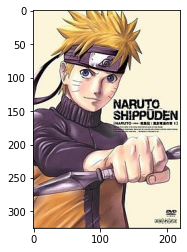

Encryption Complete.


In [ ]:
imgdis(img)
encrypt(key, img, enc)

In [ ]:
## Error in Reading Encyrpted File
try:
  imgdis(enc)
except :
  print("UnidentifiedImageError : Cannot identify Image File.")

UnidentifiedImageError : Cannot identify Image File.


## Decryption

In [ ]:
decrypt(key, enc, out)
imgdis(out)